## Observations and Insights

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

# Observations

There are no outliers
 
Even though Propriva is the fourth more effective drug regarding size reduction paradoxically kills many test subjects.
 
There is a moderate correlation between weight and tumor volume, at least in Capomulin treated mice

Capomulin and Ramican are by far the most effective drugs. Ceftamin and Infubinol, even though are the second most effective, have effects similar to a Placebo.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
combined_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_results_df = pd.DataFrame(combined_results)
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and
# SEM of the tumor volume for each regimen

summary_statistics_df = pd.DataFrame ({
    "Tumor Volume Mean": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].mean(),1),
    "Tumor Volume Median": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].median(),1),
    "Tumor Volume Variance": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].var(),1),
    "Tumor Volume Population Standard Deviation": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].std(),1),
    "Tumor Volume SEM": round(combined_results_df.groupby(
        "Drug Regimen")["Tumor Volume (mm3)"].sem(),1)
    
})

#Formating
th_props = [
  ('font-size', '14px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#F7F5FB'),
  ('background-color', '#324A5F')
  ]

td_props = [
  ('font-size', '13px'),
    ('text-align', 'center')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]


(summary_statistics_df.style
    .set_table_styles(styles))

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Population Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.7,41.6,24.9,5,0.3
Ceftamin,52.6,51.8,39.3,6.3,0.5
Infubinol,52.9,51.8,43.1,6.6,0.5
Ketapril,55.2,53.7,68.6,8.3,0.6
Naftisol,54.3,52.5,66.2,8.1,0.6
Placebo,54,52.3,61.2,7.8,0.6
Propriva,52.3,50.9,42.4,6.5,0.5
Ramicane,40.2,40.7,23.5,4.8,0.3
Stelasyn,54.2,52.4,59.5,7.7,0.6


## Bar plots

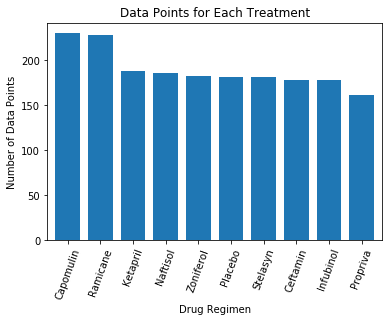

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
(combined_results_df["Drug Regimen"]
     .value_counts()
     .plot(kind="bar",title ="Data Points for Each Treatment", width = .75)
)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 70)
plt.show()

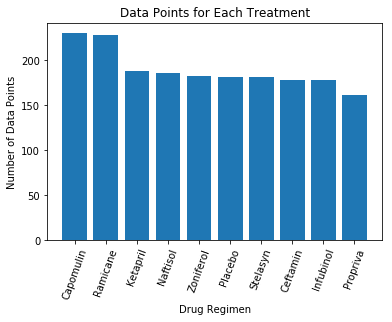

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen = combined_results_df["Drug Regimen"].value_counts().index
data_points = combined_results_df["Drug Regimen"].value_counts().tolist()
plt.bar(drug_regimen, data_points)
plt.xticks(rotation = 70)
plt.title("Data Points for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

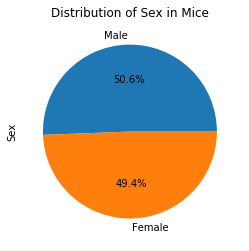

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
(combined_results_df["Sex"]
     .value_counts()
     .plot(kind="pie",title ="Distribution of Sex in Mice", autopct = "%1.1f%%")
)
plt.show()

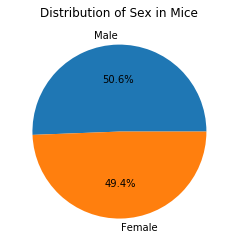

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
number_mice = combined_results_df["Sex"].value_counts().tolist()
plt.pie(number_mice, labels = labels, autopct = "%1.1f%%")
plt.title("Distribution of Sex in Mice")
plt.show()

## Quartiles, outliers and boxplots

This table cointains the final final tumor volume of each mouse across four of the most promising treatment regimens only when a certain mouse survived until the end of the treatment.

I am considering the four most promising treatments as the ones that cause the greatest reduction in tumor size and didn't kill the mouse before the 45 timepoint.

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

surviving_mouse = combined_results_df["Timepoint"] == 45
sm = combined_results_df[surviving_mouse]

final_size_df = pd.DataFrame ({
    "Drug Regimen" : combined_results_df.groupby("Mouse ID")["Drug Regimen"].first(),
    'Initial Tumor Size (mm3)': combined_results_df.groupby('Mouse ID')['Tumor Volume (mm3)'].first(),
    "Final Tumor Size (mm3)" : sm.groupby("Mouse ID")["Tumor Volume (mm3)"].first(),
    "Reduction in Tumor Size (mm3)": round((combined_results_df.groupby(
        "Mouse ID")["Tumor Volume (mm3)"].first() - 
                        sm.groupby("Mouse ID")["Tumor Volume (mm3)"].last()),2),
})


top_four = final_size_df.groupby(
    "Drug Regimen")["Reduction in Tumor Size (mm3)"].mean().sort_values(ascending = False).head(4).index

final_size_df = (final_size_df
                 .loc[final_size_df["Drug Regimen"].isin(top_four)]
                 .sort_values(by = "Reduction in Tumor Size (mm3)", ascending = False))

final_size_df = final_size_df.dropna()
#Formating
(final_size_df
    .style
    .set_table_styles(styles))

,Drug Regimen,Initial Tumor Size (mm3),Final Tumor Size (mm3),Reduction in Tumor Size (mm3)
k403,Ramicane,45,22.0501,22.95
s185,Capomulin,45,23.3436,21.66
m601,Capomulin,45,28.431,16.57
x401,Capomulin,45,28.484,16.52
g791,Ramicane,45,29.1285,15.87
s508,Ramicane,45,30.2762,14.72
m546,Ramicane,45,30.5646,14.44
z578,Ramicane,45,30.6387,14.36
u364,Capomulin,45,31.0239,13.98
n364,Ramicane,45,31.0953,13.9


This table cointains the final final tumor volume of each mouse across four of the most promising treatment regimens taking as final size the last timpoint wehther they survived until the 45 timepoint or not.

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
final_size_df_complete = pd.DataFrame ({
    "Drug Regimen" : combined_results_df.groupby("Mouse ID")["Drug Regimen"].first(),
    'Initial Tumor Size (mm3)': combined_results_df.groupby('Mouse ID')['Tumor Volume (mm3)'].first(),
    "Final Tumor Size (mm3)" : combined_results_df.groupby("Mouse ID")["Tumor Volume (mm3)"].last(),
    'Last Timepoint' : combined_results_df.groupby("Mouse ID")["Timepoint"].last(),
    "Reduction in Tumor Size (mm3)": round((combined_results_df.groupby(
        "Mouse ID")["Tumor Volume (mm3)"].first() - 
                        combined_results_df.groupby("Mouse ID")["Tumor Volume (mm3)"].last()),2),
})

final_size_df_complete = (final_size_df_complete
                 .loc[final_size_df_complete["Drug Regimen"].isin(top_four)]
                 .sort_values(by = "Reduction in Tumor Size (mm3)", ascending = False))


#Formating
(final_size_df_complete
    .style
    .set_table_styles(styles))

,Drug Regimen,Initial Tumor Size (mm3),Final Tumor Size (mm3),Last Timepoint,Reduction in Tumor Size (mm3)
Mouse ID,,,,,
k403,Ramicane,45,22.0501,45,22.95
s185,Capomulin,45,23.3436,45,21.66
m601,Capomulin,45,28.431,45,16.57
x401,Capomulin,45,28.484,45,16.52
g791,Ramicane,45,29.1285,45,15.87
s508,Ramicane,45,30.2762,45,14.72
f966,Capomulin,45,30.486,20,14.51
m546,Ramicane,45,30.5646,45,14.44
z578,Ramicane,45,30.6387,45,14.36


In [10]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# All promising treatments
quartiles = final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Reduction in Tumor Size is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size is: {iqr}\n")
print(f"The median of Reduction in Tumor Size is: {quartiles[0.5]}\n")


#The bounds are calculated with the method seen in class
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = final_size_df.loc[final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = final_size_df.loc[final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

The lower quartile of Reduction in Tumor Size is: -17.15

The upper quartile of Reduction in Tumor Size is: 11.52

The interquartile range of Reduction in Tumor Size is: 28.67

The median of Reduction in Tumor Size is: 4.84

Values below -60.16 could be outliers.

There are no outliers

Values above 54.53 could be outliers.

There are no outliers


In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Ramicane
ramicane = final_size_df["Drug Regimen"] == "Ramicane"
ramicane_final_size_df = final_size_df[ramicane]
selected_regimen = ramicane_final_size_df.iloc[0,0]

quartiles = ramicane_final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Reduction in Tumor Size using {selected_regimen} is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size using {selected_regimen}  is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size using {selected_regimen} is: {iqr}\n")
print(f"The median of Reduction in Tumor Size using {selected_regimen} is: {round(quartiles[0.5],2)}\n")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = ramicane_final_size_df.loc[ramicane_final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = ramicane_final_size_df.loc[ramicane_final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

The lower quartile of Reduction in Tumor Size using Ramicane is: 6.49

The upper quartile of Reduction in Tumor Size using Ramicane  is: 14.02

The interquartile range of Reduction in Tumor Size using Ramicane is: 7.53

The median of Reduction in Tumor Size using Ramicane is: 10.15

Values below -4.8 could be outliers.

There are no outliers

Values above 25.32 could be outliers.

There are no outliers


In [14]:
# Capomulin
capomulin = final_size_df["Drug Regimen"] == "Capomulin"
capomulin_final_size_df = final_size_df[capomulin]
selected_regimen = capomulin_final_size_df.iloc[0,0]

quartiles = capomulin_final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Reduction in Tumor Size using {selected_regimen} is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size using {selected_regimen}  is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size using {selected_regimen} is: {iqr}\n")
print(f"The median of Reduction in Tumor Size using {selected_regimen} is: {quartiles[0.5]}\n")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = capomulin_final_size_df.loc[capomulin_final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = capomulin_final_size_df.loc[capomulin_final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

The lower quartile of Reduction in Tumor Size using Capomulin is: 4.84

The upper quartile of Reduction in Tumor Size using Capomulin  is: 12.62

The interquartile range of Reduction in Tumor Size using Capomulin is: 7.78

The median of Reduction in Tumor Size using Capomulin is: 7.69

Values below -6.83 could be outliers.

There are no outliers

Values above 24.29 could be outliers.

There are no outliers


In [15]:
# Infubinol
infubinol = final_size_df["Drug Regimen"] == "Infubinol"
infubinol_final_size_df = final_size_df[infubinol]
selected_regimen = infubinol_final_size_df.iloc[0,0]

quartiles = infubinol_final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Reduction in Tumor Size using {selected_regimen} is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size using {selected_regimen}  is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size using {selected_regimen} is: {iqr}\n")
print(f"The median of Reduction in Tumor Size using {selected_regimen} is: {quartiles[0.5]}\n")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = infubinol_final_size_df.loc[infubinol_final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = infubinol_final_size_df.loc[infubinol_final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

The lower quartile of Reduction in Tumor Size using Infubinol is: -22.69

The upper quartile of Reduction in Tumor Size using Infubinol  is: -17.75

The interquartile range of Reduction in Tumor Size using Infubinol is: 4.94

The median of Reduction in Tumor Size using Infubinol is: -21.08

Values below -30.1 could be outliers.

There are no outliers

Values above -10.34 could be outliers.

There are no outliers


In [16]:
# Ceftamin
ceftamin = final_size_df["Drug Regimen"] == "Ceftamin"
ceftamin_final_size_df = final_size_df[ceftamin]
selected_regimen = ceftamin_final_size_df.iloc[0,0]

quartiles = ceftamin_final_size_df["Reduction in Tumor Size (mm3)"].quantile([0.25,0.5,0.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of Reduction in Tumor Size using {selected_regimen} is: {lowerq}\n")
print(f"The upper quartile of Reduction in Tumor Size using {selected_regimen}  is: {upperq}\n")
print(f"The interquartile range of Reduction in Tumor Size using {selected_regimen} is: {iqr}\n")
print(f"The median of Reduction in Tumor Size using {selected_regimen} is: {quartiles[0.5]}\n")

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

lower_outliers = ceftamin_final_size_df.loc[ceftamin_final_size_df["Reduction in Tumor Size (mm3)"] <= lower_bound]
upper_outliers = ceftamin_final_size_df.loc[ceftamin_final_size_df["Reduction in Tumor Size (mm3)"] >= upper_bound]

print(f"Values below {lower_bound} could be outliers.\n")

if lower_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {lower_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')

print(f"\nValues above {upper_bound} could be outliers.\n")
      
if upper_outliers.empty == True:
      print("There are no outliers")
else:
    print(f'The following values could be considered outliers:\n {upper_outliers["Reduction in Tumor Size (mm3)"].to_frame()}')
          
          
     

The lower quartile of Reduction in Tumor Size using Ceftamin is: -22.53

The upper quartile of Reduction in Tumor Size using Ceftamin  is: -16.43

The interquartile range of Reduction in Tumor Size using Ceftamin is: 6.1

The median of Reduction in Tumor Size using Ceftamin is: -19.3

Values below -31.68 could be outliers.

There are no outliers

Values above -7.28 could be outliers.

There are no outliers


The following boxplots graphs are calculated based on the four most promising treatments and only taking into account the mice that survived until the 45 timepoint.

In [47]:
# Placebo Data
final_size_df_placebo = pd.DataFrame ({
    "Drug Regimen" : combined_results_df.groupby("Mouse ID")["Drug Regimen"].first(),
    'Initial Tumor Size (mm3)': combined_results_df.groupby('Mouse ID')['Tumor Volume (mm3)'].first(),
    "Final Tumor Size (mm3)" : sm.groupby("Mouse ID")["Tumor Volume (mm3)"].first(),
    "Reduction in Tumor Size (mm3)": round((combined_results_df.groupby(
        "Mouse ID")["Tumor Volume (mm3)"].first() - 
                        sm.groupby("Mouse ID")["Tumor Volume (mm3)"].last()),2),
})


final_size_df_placebo = final_size_df_placebo.dropna()

final_size_df_placebo = final_size_df_placebo.loc[final_size_df_placebo ["Drug Regimen"] == "Placebo"]

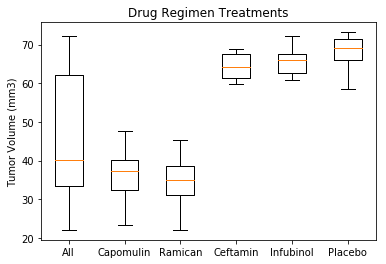

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data =[final_size_df["Final Tumor Size (mm3)"], 
       capomulin_final_size_df["Final Tumor Size (mm3)"],
      ramicane_final_size_df["Final Tumor Size (mm3)"],
      ceftamin_final_size_df["Final Tumor Size (mm3)"],
      infubinol_final_size_df["Final Tumor Size (mm3)"],
       final_size_df_placebo["Final Tumor Size (mm3)"]
      ]
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen Treatments')
ax1.boxplot(data, labels=(
    "All","Capomulin","Ramican",'Ceftamin', 'Infubinol', "Placebo"),
           flierprops=green_diamond)

plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [28]:
# import seaborn as sns
# ax = sns.boxplot(data=data)
 
# ax = sns.swarmplot(data=data, color="grey")

## Line and scatter plots

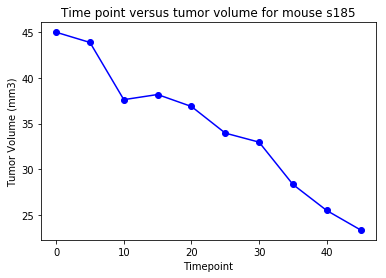

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treated = combined_results_df.loc[combined_results_df["Drug Regimen"] == "Capomulin"]
selected_mouse = capomulin_treated.iloc[0,0]
selected_mouse_results = combined_results_df.loc[combined_results_df["Mouse ID"] == selected_mouse]
x_axis = selected_mouse_results["Timepoint"]
y_axis = selected_mouse_results["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color="blue", marker="o")

plt.title(f"Time point versus tumor volume for mouse {selected_mouse}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


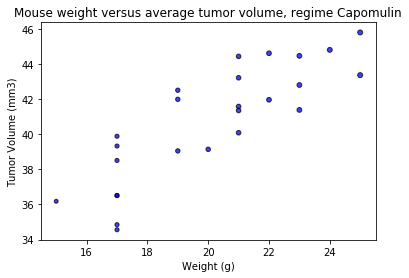

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_treated = combined_results_df.loc[combined_results_df["Drug Regimen"] == "Capomulin"]

x_axis = capomulin_treated.groupby("Mouse ID")["Weight (g)"].first()
y_axis = capomulin_treated.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolors="black", alpha=0.75, s=x_axis)

plt.title(f"Mouse weight versus average tumor volume, regime Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [26]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
weight = capomulin_treated["Weight (g)"]
tumor_size = capomulin_treated["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor_size)
print(
    f"The correlation between weight and tumor volume is {round(correlation[0],2)}"
    f", which makes for a moderate correlation")

The correlation between weight and tumor volume is 0.53, which makes for a moderate correlation


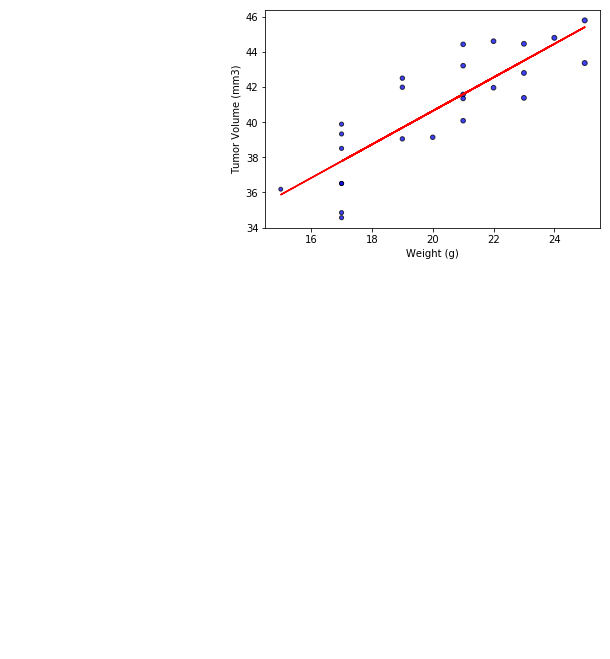

In [27]:
x_axis = capomulin_treated.groupby("Mouse ID")["Weight (g)"].first()
y_axis = capomulin_treated.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolors="black", alpha=0.75, s=x_axis)

plt.plot(x_axis,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()